In [35]:
from pandas import DataFrame, read_csv, read_table

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerLine2D
import pandas as pd #this is how I usually import pandas

%matplotlib inline

matplotlib.rcParams.update({'font.size': 12, 'font.family': 'serif'})

# Figure: Absorption Spectra

In [5]:
spectra_file = r'./dat/absorption_spectra.csv'
spectra = pd.read_csv(spectra_file)

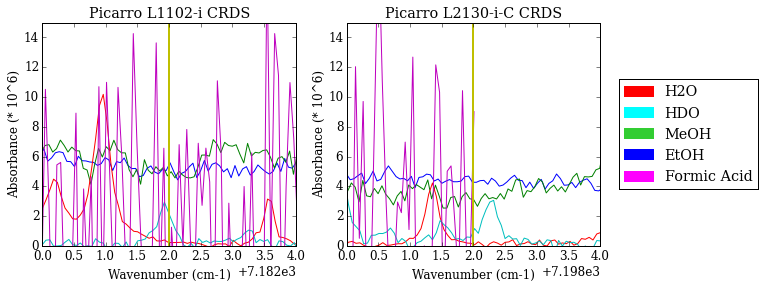

In [128]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
L1102 = 7184
breadth = 2
axes[0].set_title("Picarro L1102-i CRDS")
axes[0].plot(spectra.wn_etoh, spectra.abs10e6_etoh)
axes[0].plot(spectra.wn_meoh, spectra.abs10e6_meoh)
axes[0].plot(spectra.wn_h2o, spectra.abs10e6_h2o)
axes[0].plot(spectra.wn_hdo, spectra.abs10e6_hdo)
axes[0].plot(spectra.wn_facid, spectra.abs10e6_facid)
axes[0].plot([L1102, L1102], [0, 15], lw = 2)
# ^ replace this with a patch
axes[0].set_xlim([L1102-breadth, L1102+breadth])
axes[0].set_ylim([0, 15])
axes[0].set_xlabel('Wavenumber (cm-1)')
axes[0].set_ylabel('Absorbance (* 10^6)')

L2130 = 7200
axes[1].set_title("Picarro L2130-i-C CRDS")
axes[1].plot(spectra.wn_etoh, spectra.abs10e6_etoh)
axes[1].plot(spectra.wn_meoh, spectra.abs10e6_meoh)
axes[1].plot(spectra.wn_h2o, spectra.abs10e6_h2o)
axes[1].plot(spectra.wn_hdo, spectra.abs10e6_hdo)
axes[1].plot(spectra.wn_facid, spectra.abs10e6_facid)
axes[1].plot([L2130, L2130], [0, 15], lw = 2)
# ^ replace this with a patch
axes[1].set_xlim([L2130-breadth, L2130+breadth])
axes[1].set_ylim([0,15])
axes[1].set_xlabel('Wavenumber (cm-1)')
axes[1].set_ylabel('Absorbance (* 10^6)')

# Legend (outside right)
h2o_patch = mpatches.Patch(color='red', label='H2O')
hdo_patch = mpatches.Patch(color='cyan', label='HDO')
meoh_patch = mpatches.Patch(color='limegreen', label='MeOH')
etoh_patch = mpatches.Patch(color='blue', label='EtOH')
facid_patch = mpatches.Patch(color='magenta', label='Formic Acid')

plt.legend(handles=[h2o_patch, hdo_patch, meoh_patch, etoh_patch, facid_patch], bbox_to_anchor=(1.65, 0.5), loc = 5);




Near IR Absorbance Region of 7,180 and 7,200 cm-1: study of overlap between organics and water isotopologues.

TO DO: xaxis labels. narrow the xlims. define the analysis region. add legend (outside right?).

DONE:

1) ANALYSIS REGION: L1102-> 7182.5-7184.5 cm-1 // L2130-> 7199-7200.5 cm-1.
2) Legend completed
3) Axis Labelling

# Figure: EtOH impacts on apparent isotope values

In [7]:
etoh_file = r'./dat/etoh_impacts.csv'
etoh = pd.read_csv(etoh_file)

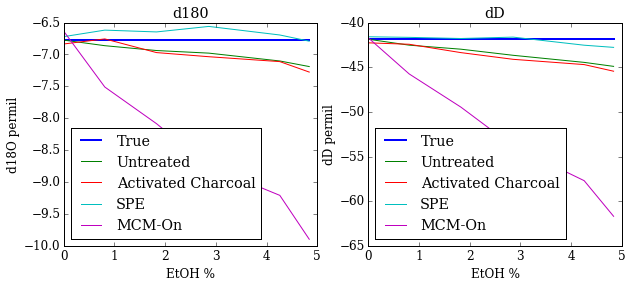

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].set_title("d180")
axes[0].set_xlabel("EtOH %")
axes[0].set_ylabel("d18O permil")
axes[0].plot(etoh.etoh, etoh.d18O_true, lw = 2, label="True")
axes[0].plot(etoh.etoh, etoh.d18O_untrt, label="Untreated")
axes[0].plot(etoh.etoh, etoh.d18O_ac, label="Activated Charcoal")
axes[0].plot(etoh.etoh, etoh.d18O_spe, label="SPE")
axes[0].plot(etoh.etoh, etoh.d18O_mcmon, label="MCM-On")
axes[0].legend(loc=3) # upper left corner

axes[1].set_title("dD")
axes[1].set_xlabel("EtOH %")
axes[1].set_ylabel("dD permil")
axes[1].plot(etoh.etoh, etoh.dD_true, lw = 2, label="True")
axes[1].plot(etoh.etoh, etoh.dD_untrt, label="Untreated")
axes[1].plot(etoh.etoh, etoh.dD_ac, label="Activated Charcoal")
axes[1].plot(etoh.etoh, etoh.dD_spe, label="SPE")
axes[1].plot(etoh.etoh, etoh.dD_mcmon, label="MCM-On")
axes[1].legend(loc=3) # upper left corner

# TODO: get the 2 sigma noise from K5A QC and represent True as a patch

Ethanol impacts on delta values with 3 treatment methods:(1) AC, (2) SPE, (3) MCM.

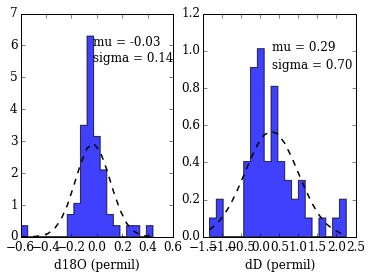

In [10]:
qc_file = r'./dat/K5A_QC_Variation.csv'
qc = pd.read_csv(qc_file)

HERA_d18O_true = qc.HERA_d18O_true[0]
HERA_dD_true = qc.HERA_dD_true[0]

import numpy as np
import pylab as P

# fig, axes = plt.subplots(1, 2, figsize=(10,4))
P.figure()

P.subplot(121)
mu = np.mean(qc.HERA_d18O-HERA_d18O_true)
sigma = np.std(qc.HERA_d18O-HERA_d18O_true)

n, bins, patches = P.hist(qc.HERA_d18O-HERA_d18O_true, 20, normed=True, histtype='stepfilled')
P.setp(patches, 'facecolor', 'b', 'alpha', 0.75)

# add a line showing the expected distribution
y = P.normpdf(bins, mu, sigma)
P.plot(bins, y, 'k--', linewidth=1.5)
mutext = "mu = %4.2f" % mu
sigtext = "sigma = %4.2f" % sigma
P.text(mu, 6.0, mutext)
P.text(mu, 5.5, sigtext)
P.xlabel('d18O (permil)')

P.subplot(122)
mu = np.mean(qc.HERA_dD-HERA_dD_true)
sigma = np.std(qc.HERA_dD-HERA_dD_true)

n, bins, patches = P.hist(qc.HERA_dD-HERA_dD_true, 20, normed=True, histtype='stepfilled')
P.setp(patches, 'facecolor', 'b', 'alpha', 0.75)

# add a line showing the expected distribution
y = P.normpdf(bins, mu, sigma)
P.plot(bins, y, 'k--', linewidth=1.5)
mutext = "mu = %4.2f" % mu
sigtext = "sigma = %4.2f" % sigma
P.text(mu, 1.0, mutext)
P.text(mu, 0.9, sigtext)
P.xlabel('dD (permil)')


Normal distribution plot of the K5A value differences from the known (bottle) value.
+/- 2 sigma defines the upper and lower thresholds for instrumental error.